In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import numpy as np
data = np.array([
    [1,2,3],
    [4,8,5],
    [3,12,9],
    [1,8,5],
    [5,14,2],
    [7,4,1],
    [9,8,9],
    [3,8,1],
    [11,5,6],
    [10,11,7]
])
# center data 
center_data = data - np.mean(data,axis=0)

print(center_data)

[[-4.4 -6.  -1.8]
 [-1.4  0.   0.2]
 [-2.4  4.   4.2]
 [-4.4  0.   0.2]
 [-0.4  6.  -2.8]
 [ 1.6 -4.  -3.8]
 [ 3.6  0.   4.2]
 [-2.4  0.  -3.8]
 [ 5.6 -3.   1.2]
 [ 4.6  3.   2.2]]


In [2]:
def cov(x,y):
    return np.sum(x.dot(y))/len(x)

cov_mat = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        cov_mat[i,j] = cov(center_data[:,i], center_data[:,j])

print("Covariance matrix:\n")
print(cov_mat)

# cov_mat = np.array([
#     [12.04,0.5,3.28],
#     [0.5,12.2,2.9],
#     [3.28,2.9,8.16]
# ])


Covariance matrix:

[[12.04  0.5   3.28]
 [ 0.5  12.2   2.9 ]
 [ 3.28  2.9   8.16]]


In [3]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat,)
print("Eigen values:")
print(eig_val_cov[::-1])
print()
print("Eigen vectors")
# print(eig_vec_cov)
v_vec = np.zeros((3,3))
for i in range(3):
    v_vec[:,i] = eig_vec_cov[:,2-i]
print(v_vec)

Eigen values:
[15.2974434  11.63052369  5.47203291]

Eigen vectors
[[-0.6165947  -0.67817891  0.39985541]
 [-0.58881629  0.73439013  0.33758926]
 [-0.52259579 -0.02728563 -0.85214385]]


In [4]:
principal_components = np.matmul(center_data, v_vec[:,:])


In [5]:
np.set_printoptions(precision=2)
print("Principal Components:\n")
print(principal_components)


Principal Components:

[[ 7.19 -1.37 -2.25]
 [ 0.76  0.94 -0.73]
 [-3.07  4.45 -3.19]
 [ 2.61  2.98 -1.93]
 [-1.82  4.75  4.25]
 [ 3.35 -3.92  2.53]
 [-4.41 -2.56 -2.14]
 [ 3.47  1.73  2.28]
 [-2.31 -6.03  0.2 ]
 [-5.75 -0.98  0.98]]


In [6]:
# Cov(pc1,pc1) = eigen_value_1
cov(principal_components[:,0], principal_components[:,0])


15.29744339791175

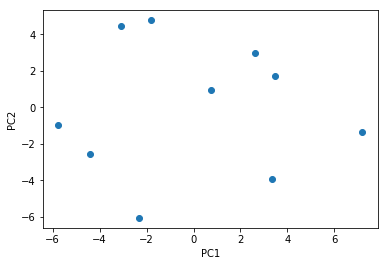

avg reconstruction err: 26.93


In [7]:
import matplotlib.pyplot as plt
def sqr(a,b):
    return (b[0]-a[0])**2 + (b[1]-a[1])**2

plt.scatter(principal_components[:,0], principal_components[:,1])
summ = 0
for i in range(10):
    # plt.text(principal_components[:,0][i], principal_components[:,1][i], i+1)
    # plt.plot([0,principal_components[:,0][i]],[0, principal_components[:,1][i]])
    summ+=sqr((0,0), (principal_components[:,0][i], principal_components[:,1][i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
print(f"avg reconstruction err: {summ/10:.2f}")